In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Unidirectd graph
G = nx.Graph()

# Directed graph
D = nx.DiGraph()

#### Adding Nodes & Edges

In [8]:
# Add single nodes
G.add_node("A")
G.add_nodes_from(["B", "C", "D"])

# Add edges (automatically adds nodes if missing)
G.add_edge("A", "B")
G.add_edges_from([("A", "C"), ("B", "C"), ("C", "D")])

In [11]:
# Attach attributes
G.add_node("E", role="server", color="red")
G.add_edge("A", "E", weight=4.2, relation="friend")

In [14]:
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: ['A', 'B', 'C', 'D', 'E']
Edges: [('A', 'B'), ('A', 'C'), ('A', 'E'), ('B', 'C'), ('C', 'D')]


#### Basic Graph Operations

In [16]:
# Number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Lists of nodes and edges
print("List of nodes:", list(G.nodes(data=True)))
print("List of edges:", list(G.edges(data=True)))

# Check existence
"A" in G  # True
G.has_edge("A", "B")  # True

Number of nodes: 5
Number of edges: 5
List of nodes: [('A', {}), ('B', {}), ('C', {}), ('D', {}), ('E', {'role': 'server', 'color': 'red'})]
List of edges: [('A', 'B', {}), ('A', 'C', {}), ('A', 'E', {'weight': 4.2, 'relation': 'friend'}), ('B', 'C', {}), ('C', 'D', {})]


True

### Graph Metrics
NetworkX includes many built-in measures. Here are some of the most common:

#### Degree & Degree Centrality

In [ ]:
# Degree of each node
print(dict(G.degree()))

# Degree centrality (normalized degree)
print(nx.degree_centrality(G))
# Degree centrality is calculated as the number of edges connected to a node divided by the maximum possible number of edges (n-1).
# Eg. A has 3 edges and the maximum possible is 4 (A, B, C, D) => 3/4 = 0.75.

{'A': 3, 'B': 2, 'C': 3, 'D': 1, 'E': 1}
{'A': 0.75, 'B': 0.5, 'C': 0.75, 'D': 0.25, 'E': 0.25}


#### Shortest Paths

In [ ]:
# Single-source shortest path length
print(nx.single_source_shortest_path_length(G, "A"))

# Shortest path between two nodes
print(nx.shortest_path(G, "A", "D")) # ['A', 'C', 'D']

{'A': 0, 'B': 1, 'C': 1, 'E': 1, 'D': 2}
['A', 'C', 'D']


#### Clustering Coefficient

In [ ]:
# Local clustering coefficient (triangle ratio) per node
print(nx.clustering(G))
# Local clustering coefficient is the number of edges between the neighbors of a node divided by the number of possible edges between those neighbors. It describes how well connected the neighbors of a node are.

# Global clustering coefficient
print(nx.transitivity(G))
# Global clustering coefficient is the ratio of the number of triangles in the graph to the number of connected triples of nodes. It describes how well connected the entire graph is.

{'A': 0.3333333333333333, 'B': 1.0, 'C': 0.3333333333333333, 'D': 0, 'E': 0}
0.42857142857142855


#### Centrality Measures

In [22]:
# Betweenness centrality
print(nx.betweenness_centrality(G))
# Betweenness centrality is a measure of the number of times a node acts as a bridge along the shortest path between two other nodes. It is calculated as the sum of the fraction of all-pairs shortest paths that pass through the node.
# It is a measure of the influence a node has over the flow of information in the network.
# It is calculated as the sum of the fraction of all-pairs shortest paths that pass through the node.

# Closeness centrality
print(nx.closeness_centrality(G))
# Closeness centrality is a measure of how close a node is to all other nodes in the network. It is calculated as the reciprocal of the average shortest path length from the node to all other nodes in the network.
# It is a measure of the ability of a node to access other nodes in the network.
# It is calculated as the reciprocal of the average shortest path length from the node to all other nodes in the network.

# Eigenvector centrality
print(nx.eigenvector_centrality(G, max_iter=1000))
# Eigenvector centrality is a measure of the influence of a node in a network. It is calculated as the principal eigenvector of the adjacency matrix of the graph.
# It is a measure of the influence of a node in a network. It is calculated as the principal eigenvector of the adjacency matrix of the graph.
# It is a measure of the influence of a node in a network. It is calculated as the principal eigenvector of the adjacency matrix of the graph.

{'A': 0.5, 'B': 0.0, 'C': 0.5, 'D': 0.0, 'E': 0.0}
{'A': 0.8, 'B': 0.6666666666666666, 'C': 0.8, 'D': 0.5, 'E': 0.5}
{'A': 0.5650995704550302, 'B': 0.4907983260941701, 'C': 0.5650995704550302, 'D': 0.2453996271861893, 'E': 0.2453996271861893}


### 5. Community Detection
Simple example using the Girvan-Newman method:


In [ ]:
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(G)
# Take the first level of splits:
first_split = next(communities)
print([list(c) for c in first_split])

# Girvan-Newman algorithm
# The Girvan-Newman algorithm is a method for detecting communities in a graph. It works by iteratively removing edges from the graph that are "bridges" between communities, until the graph is split into separate components.
# The algorithm is based on the idea that edges that are "bridges" between communities are more likely to be removed than edges that are within communities.


[['E', 'A'], ['C', 'B', 'D']]


### 6. Visualization
Basic drawing with Matplotlib:

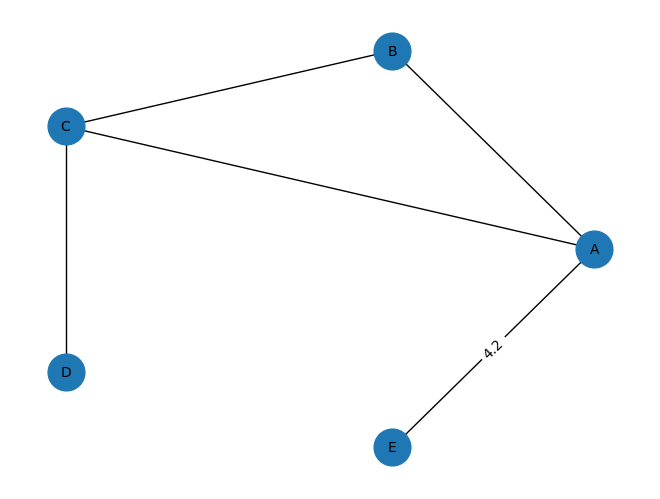

In [25]:
# pos = nx.spring_layout(G)  # force-directed layout
pos = nx.circular_layout(G)  # circular layout
nx.draw(G, pos, with_labels=True, node_size=700, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

You can color or size nodes by a metric:

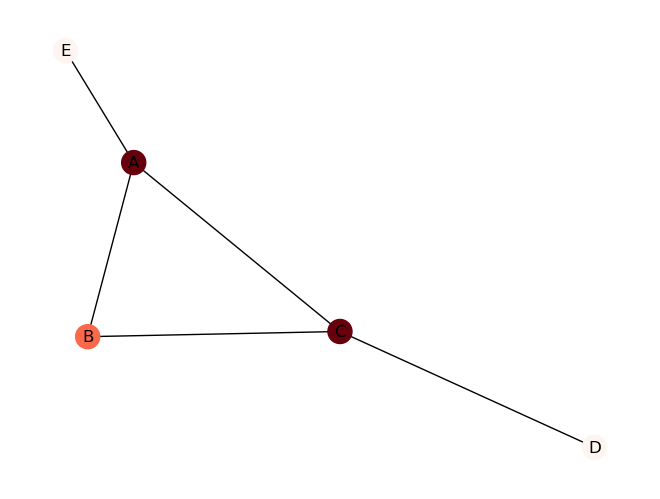

In [31]:
deg_centrality = nx.degree_centrality(G)
node_colors = [deg_centrality[n] for n in G]
nx.draw(G, pos,
        node_color=node_colors,
        cmap=plt.cm.Reds,
        with_labels=True)
plt.show()

### 7. Reading & Writing Graphs
NetworkX can import/export many formats:

In [ ]:
# From an edge list file
G = nx.read_edgelist("path/to/edgelist.txt", nodetype=str)

# From GraphML (XML)
G = nx. read_graphml("path/to/network.graphml")

# To GEXF (for Gephi)
nx.write_gexf(G, "output_network.gexf")


FileNotFoundError: [Errno 2] No such file or directory: 'edgelist.txt'

#### Worked Example: Analyzing a Small Social Network

Degree centrality: {'Alice': 0.4, 'Bob': 0.4, 'Claire': 0.4, 'Dennis': 0.6000000000000001, 'Elle': 0.4, 'Frank': 0.2}
Betweenness centrality: {'Alice': 0.05, 'Bob': 0.15000000000000002, 'Claire': 0.15000000000000002, 'Dennis': 0.65, 'Elle': 0.4, 'Frank': 0.0}


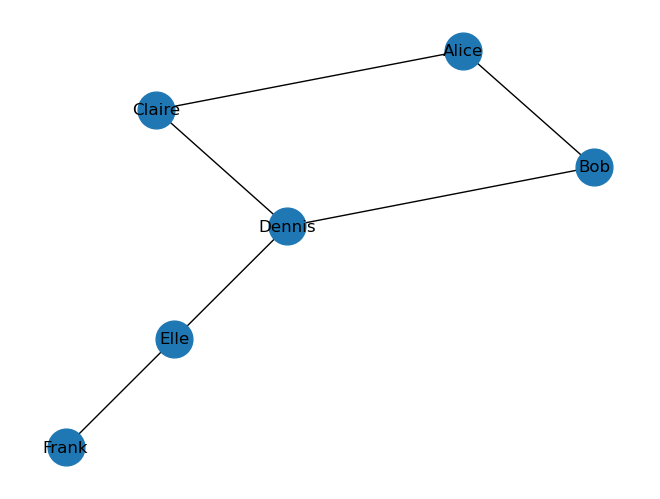

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create the graph
G = nx.Graph()
edges = [
    ("Alice", "Bob"), ("Alice", "Claire"),
    ("Bob", "Dennis"), ("Claire", "Dennis"),
    ("Dennis", "Elle"), ("Elle", "Frank"),
]
G.add_edges_from(edges)

# 2. Compute metrics
print("Degree centrality:", nx.degree_centrality(G))
print("Betweenness centrality:", nx.betweenness_centrality(G))

# 3. Visualize
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700)
plt.show()


## 9. Tips & Best Practices

* **Choose the right graph type**: directed vs. undirected vs. multigraph.
* **Attribute storage**: use node/edge attributes to carry extra data.
* **Performance**: for very large graphs (hundreds of thousands of nodes), consider graph databases or libraries like igraph/PyGraphistry.
* **Layout**: experiment with different layouts (`spring_layout`, `circular_layout`, `kamada_kawai_layout`) for clearer visuals.
* **Extendability**: NetworkX integrates with SciPy and NumPy for advanced algorithms.

---

### Next Steps

* Explore the full set of algorithms under `networkx.algorithms` (flows, matching, spectral analysis, etc.).
* Practice on real datasets: e.g., social networks, citation graphs, transportation networks.
* Combine with data tools like Pandas to filter and prepare your node/edge data before analysis.

With these basics, you’re ready to start modeling and analyzing networks in Python. Happy graphing!
